In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import string
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#THE DATA SET
Reviewdata = pd.read_csv("flipk.csv")
Reviewdata.head(10)

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114
5,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Wonderful,"Wowwww it's amezing bluetooth nice look, nice ...",Bengaluru,8 months ago,172,37
6,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,4,Pretty good,Awesome colour! Amazing experience .. but only...,Robertsonpet,8 months ago,206,46
7,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,"For the first time, I am posting a review, jus...",Bhadreswar,"Feb, 2020",616,182
8,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,4,Delightful,First of all the Delivery boy is a good guy. N...,Tirupati,"Mar, 2020",232,66
9,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,1,Worthless,This headphone is good but not that much as i ...,Firozabad District,8 months ago,265,83


In [ ]:
#9374 ROWS AND 7 COLUMNS
Reviewdata.shape

(9374, 9)

In [ ]:
#EMPTY DATA ROWS
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB


In [ ]:
print(Reviewdata.isnull().sum())

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64


In [ ]:
#deleting uneccessary rows & columns 
#running but removed once will not run
Reviewdata.drop(columns = ['product_id', 'product_title', 'location','date','upvotes','downvotes'], inplace = True)

KeyError: ignored

In [ ]:
Reviewdata.head(10)

,rating,summary,review
0,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...
1,5,Terrific purchase,Super sound and good looking I like that prize
2,5,Super!,Very much satisfied with the device at this pr...
3,5,Super!,"Nice headphone, bass was very good and sound i..."
4,5,Terrific purchase,Sound quality super battery backup super quali...
5,5,Wonderful,"Wowwww it's amezing bluetooth nice look, nice ..."
6,4,Pretty good,Awesome colour! Amazing experience .. but only...
7,5,Terrific purchase,"For the first time, I am posting a review, jus..."
8,4,Delightful,First of all the Delivery boy is a good guy. N...
9,1,Worthless,This headphone is good but not that much as i ...


In [ ]:
import re
import string
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1= lambda x : clean(x)

In [ ]:
Reviewdata['cleaned_summary']=pd.DataFrame(Reviewdata.summary.apply(cleaned1))
Reviewdata['Cleaned Des']=pd.DataFrame(Reviewdata.review.apply(cleaned1))
Reviewdata.head()


,rating,summary,review,cleaned_summary,Cleaned Des
0,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,terrific purchase,is very clarity is good back up to to ho...
1,5,Terrific purchase,Super sound and good looking I like that prize,terrific purchase,super sound and good looking i like that prize
2,5,Super!,Very much satisfied with the device at this pr...,super,very much satisfied with the device at this pr...
3,5,Super!,"Nice headphone, bass was very good and sound i...",super,nice headphone bass was very good and sound is...
4,5,Terrific purchase,Sound quality super battery backup super quali...,terrific purchase,sound quality super battery backup super quali...


In [ ]:
ratings = Reviewdata["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
figure = px.pie(Reviewdata, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

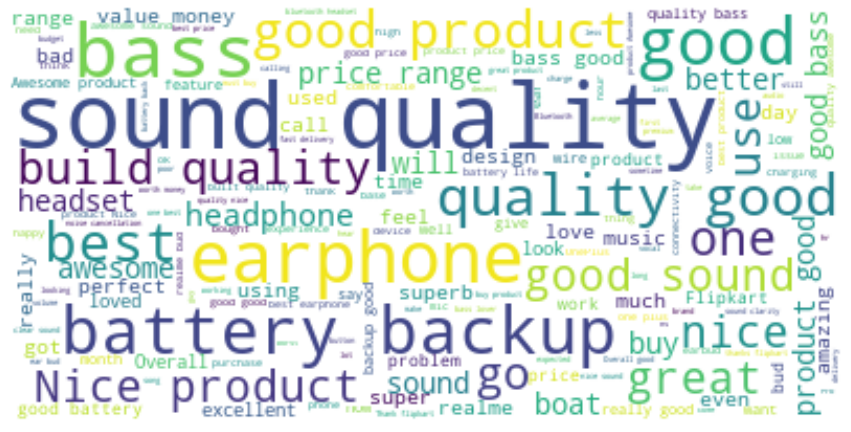

In [ ]:
text = " ".join(i for i in Reviewdata.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
x=Reviewdata['rating']
x=pd.to_numeric(x)

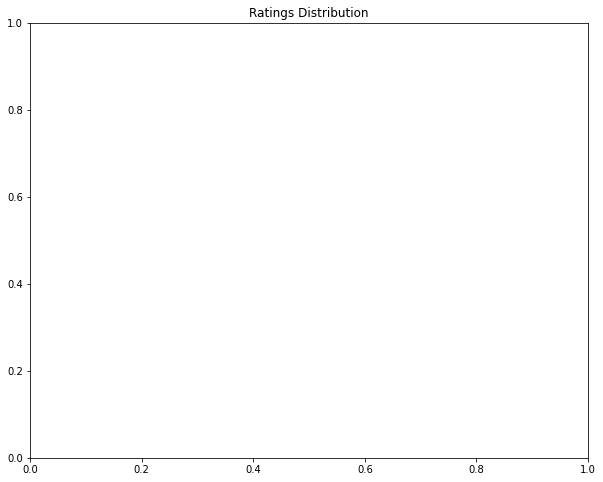

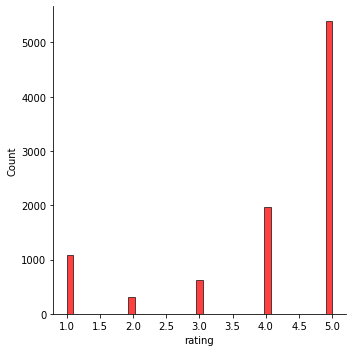

In [ ]:
plt.figure(figsize=(10,8),)
plt.title("Ratings Distribution")
sns.displot(x,color='red');

In [ ]:
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
Reviewdata["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in Reviewdata["review"]]
Reviewdata["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in Reviewdata["review"]]
Reviewdata["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in Reviewdata["review"]]
Reviewdata = Reviewdata[["review", "Positive", "Negative", "Neutral"]]
Reviewdata.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review,Positive,Negative,Neutral
0,1-more flexible2-bass is very high3-sound clar...,0.167,0.017,0.815
1,Super sound and good looking I like that prize,0.759,0.000,0.241
2,Very much satisfied with the device at this pr...,0.278,0.000,0.722
3,"Nice headphone, bass was very good and sound i...",0.286,0.082,0.632
4,Sound quality super battery backup super quali...,0.600,0.000,0.400


In [ ]:
def WordCloudForRating (Reviewdata, rating):
    df =  (Reviewdata[Reviewdata['rating'] == rating]['review'])
    corpus = ''
    
    for mem in df:
        corpus += mem
    
    corpus = re.sub('READ MORE', '', corpus)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud:  ' + str(rating) + ' star reviews')
    plt.tight_layout(pad = 0) 
  
    plt.show() 

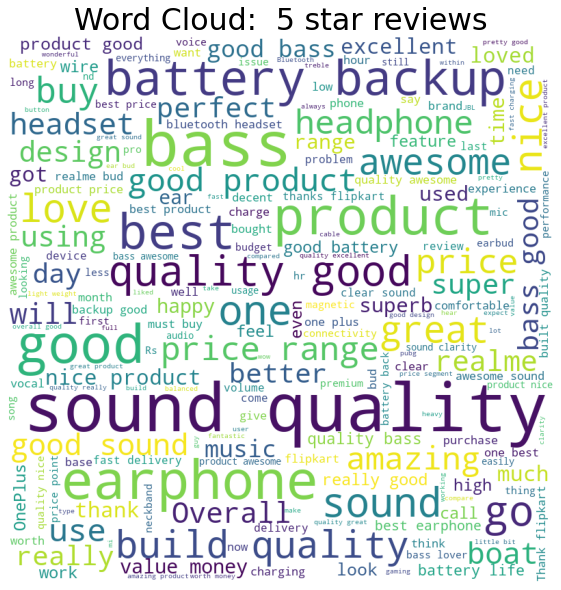

In [ ]:
WordCloudForRating(Reviewdata, 5)

In [ ]:
x = sum(Reviewdata["Positive"])
y = sum(Reviewdata["Negative"])
z = sum(Reviewdata["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3439.9740000000415
Negative:  532.5680000000009
Neutral:  5401.457999999954
